# 3M1 Introduction to optimization

Luca Magri (lm547@cam.ac.uk), office ISO-44, Hopkinson Lab.

(With many thanks to Professor Gábor Csányi.)

[Booklist](https://www.vle.cam.ac.uk/mod/book/view.php?id=364091&chapterid=49051): 
- Antoniou, A. & Lu, W.-S. Practical Optimization: Algorithms and Engineering Applications, Springer, 2007. Engineering Library: ER.227 and Part IIA Tripos shelves (3M)
- Gill, P.E., Murray, W. & Wright, M.H. Practical Optimization, Academic Press, 1981. Engineering Library: ER.115
- Luenberger, D.G. & Ye, Y. Linear and Non-Linear Programming, Springer, 4th edition 2016.  Engineering Library: ER.239.4

How to get these jupyter books:
- Click on this link https://notebooks.azure.com/lm547/projects/3M1OptLecNotes-LM will take you to the Microsoft Azure cloud system. 
 - The jupyter books will be maintained on this link, where you will find the most updated version of the book.
- After you have clicked on "clone", you will be asked to log in and use your Cambridge CrsID. 
- You will get your own copy of the jupyter books on your account  


## Topics for the seven optimization lectures:

- Introduction to optimization
- Unconstrained optimization
 - Line search
 - Gradient methods
- Constrained Optimization
 - Linear programming: Simplex Algorithm
 - Lagrange and Karush-Kuhn-Tucker (KKT) multipliers
 - Note that the Karush-Kuhn-Tucker (KKT) multipliers are also known as Kuhn-Tucker (KT) multipliers
 - Barrier and penalty methods
- Global optimisation: Simulated annealing
- Principal component analysis

## Lecture 1: List of contents
1. Introduction to optimisation

1. Definitions

1. A simple example of a can

## Nomenclature

- $f(x): \mathbb{R}^N\rightarrow\mathbb{R}$ is a nonlinear function, which we want to minimize

- $x\in\mathbb{R}^N$ is the vector containing the variables $x_1, x_2, \ldots, x_N$



- $\nabla f = \begin{pmatrix}
\frac{\partial f}{\partial x_1}, 
\frac{\partial f}{\partial x_2}, 
\ldots, 
\frac{\partial f}{\partial x_N}
 \end{pmatrix}^T = \frac{\partial f}{\partial x_i}$, $i=1,2,\ldots, N$ is the gradient 
 
- $H=\nabla(\nabla f(x))$ is the Hessian $\left(H_{i,j}=\frac{\partial^2 f}{\partial x_i\partial x_j}\right)$

## Aims
- Optimisation is the mathematical theory and computational practice of making a choice to achieve the best outcome.
- In order to optimise, we must

<!---1. Formalize the problem mathematically--->

1. Model the problem
1. Identify parameters that can be changed
1. Formulate a mathematical criterion for what is "best"
1. Identify potential constraints
1. Select an appropriate algorithm
1. Correctly interpret the result

## Goal of optimisation

- Find the parameters (or independent variables) that minimize/maximize a given quantity...
- ... possibly subject to some restrictions on the allowed range of parameters

## Definitions

- The quantity to be minimized/maximized is called the __objective function__, or __cost function__, or __utility function__, or __loss function__ 
 - This will be usually denoted $f(x)$ in these lectures, unless otherwise specified
- The parameters that can be changed are called __control__ or __decision variables__
- The restrictions on the allowed parameter values are called __constraints__

- Mathematically, the optimization problem is

  minimize
$$
\quad f(x),  \quad x = (x_1,x_2,x_3,\ldots x_N)^T
$$
subject to
$$
\quad c_i(x) = 0, \quad i=1,\ldots ,m'\quad(\textrm{equality})
$$
and
$$
\quad\qquad c_i(x) \ge 0, \quad i=m'+1,\ldots, m\quad(\textrm{inequality})
$$

- A minimum $x$ of the function $-f(x)$ is a maximum $x$ of the function $f(x)$
 - Therefore, maximization problems can be cast as minimization problems

- $f(x)$ is the __objective function__

- $x$ is the column vector of $N$ __control variables__

- $\{c_i(x)\}$ is the set of __constraint functions__

- Inequality constraints that are restrictions on the allowed values of a single control variable are called __bounds__, e.g. $x_{i\textrm{min}} \le x_i \le x_{i\textrm{max}}$

## Types of functions

- __Linear__
$$
f(x) = b^T x + c
$$

- __Quadratic__
$$
f(x) = x^T A x + b^T x + c
$$

- __Nonlinear__ typically means neither linear nor quadratic, for example
$$
f(x) = \exp(x_1) + x^T A x + b^T x + c
$$

- Nonlinear optimisation problems are typically more difficult to solve

## Types of constraints

- _Equality_ constraints can sometimes be eliminated by substitution
- _Inequality_ constraints can sometimes be left out and candidate results checked
 - We will learn to treat them formally with the KKT multipliers
- In general, constrained optimization is more difficult to solve than unconstrained optimization 

## Optimisation methods

First, we define the __optimality criteria__. Then, 

- Solve analytically. Equations derived from criteria and solved for variables
- Solve numerically. Search methods: 

 1. Initial trial point selected
 1. A move is proposed. If the objective function is reduced, the new point is retained
 1. Repeat until criteria satisfied (minimum is reached) or we run out of resources
 

Search methods are needed when 

- The number of variables is large
- The equations cannot be solved analytically

These are typical situations in engineering problems.

Different algorithms correspond to different ways of updating the variables.

## Example: What are the optimal dimensions of a 330 cc can that minimise the amount of material?

- Assume:
 - Cylindrical shape
 - 4.5% of "air space"
 
- Observe: amount of material is proportional to surface area.
 - We neglect the thickness of the can

![beer can](http://www.iconarchive.com/download/i13047/gordon-irving/simpsons-2/Duff-1.ico)

- Two independent variables
 - base radius, $r$
  - height, $h$
- The radius should be greater than or equal to $25$ $mm$ and smaller than or equal to $50$ $mm$

- The objective function to minimize is the surface area $$A = 2\pi r^2 + 2\pi r h = 2\pi (r^2 + rh)$$

- The equality constraint to impose is the can volume $$V = \pi r^2 h = 330\cdot 104.5\%\approx345  cm^3$$

- The inequality constraints to impose are
\begin{align}
25 \textrm{ mm} & \le r \le 50 \textrm{ mm}\\
h &> 0
\end{align}

- Ignore inequality constraints for now
- Eliminate $h$ using the equality constraint 

$$
A = f(r) = 2\pi\left(r^2 + \frac{V}{\pi r}\right)
$$

## Definitions

- When minimizing $f(x)$ subject to constraints
\begin{align}
S & \;\;\;\;\textbf{is the feasible region}\\
\text{any}\;x\;\;\; \in S & \;\;\;\text{is a }\textbf{feasible solution}\\
\end{align}
 for an unconstrained problem, $S$ is infinitely large.
- The __gradient__ is 

$$
g(x) = \nabla f(x) = \left[\frac{\partial f}{\partial x_1},\frac{\partial f}{\partial x_2},\ldots,
\frac{\partial f}{\partial x_N}\right]^T
$$

- The __Hessian__ is
$$
H(x) = \nabla(\nabla f(x)) = 
\begin{bmatrix} 
\frac{\partial^2 f}{\partial x_1^2} & \ldots & \frac{\partial^2 f}{\partial x_1 \partial x_N}\\
\vdots & \ddots & \vdots\\
\frac{\partial^2 f}{\partial x_N \partial x_1} & \ldots & \frac{\partial^2 f}{\partial x_N^2}
\end{bmatrix}
$$
The Hessian is a symmetric matrix by definition.

## Feasible directions

At a feasible point $x$, a direction $d$ is a __feasible direction__ if an arbitrary small move from $x$ in direction $d$ remains feasible


In [1]:
from pylab import *
import numpy as np

/home/nbuser/anaconda2_501/lib/python2.7/site-packages/matplotlib/font_manager.py:281: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


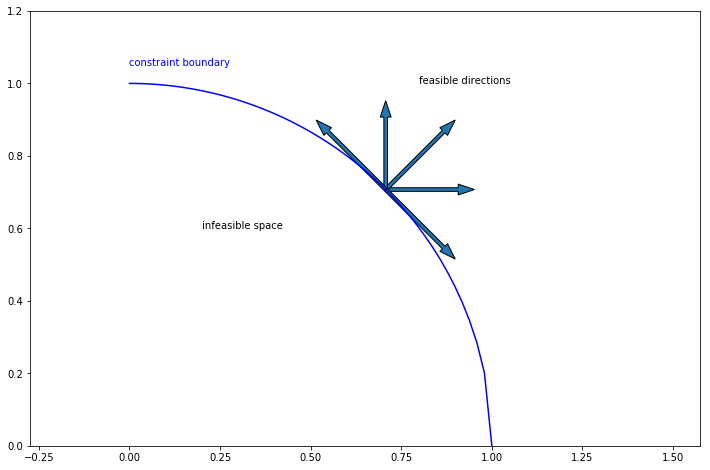

In [2]:

fig=figure(figsize=(12,8))
x = np.linspace(0,1, 50)
plot(x, np.sqrt(1-x**2), 'b')
text(0.2,0.6, 'infeasible space')
a = 1/np.sqrt(2); 
arrow(a, a, 0.2, 0, width=0.01)
arrow(a, a, 0.16, 0.16, width=0.01)
arrow(a, a, 0, 0.2, width=0.01)
arrow(a, a, 0.16, -0.16, width=0.01)
arrow(a, a, -0.16, 0.16, width=0.01)
text(0.8, 1.0, 'feasible directions')
text(0.0, 1.05, 'constraint boundary', color='b')
axis('equal')
axis((0.0, 1.3, 0.0, 1.2))
show()


## Stationary point

If $f(x)$ is smooth so that $\nabla f(x)$ exists, then $x^*$ is a __stationary point__ of $f$ if

$$
\nabla f(x^*) = 0
$$

- Minima, maxima and saddle points are stationary points

## Types of minima

$$
$$

\begin{align}
\textbf{Global minimum }\quad & f(x^*) \le f(y) \qquad \forall\, y \in S \\
\\
\textbf{Strong global minimum }\quad & f(x^*) \lt f(y) \qquad \forall\, y \in S, y \neq x^* \\
\\
\textbf{Weak local minimum }\quad & f(x^*) \le f(y) \qquad \forall\, y = x^*+\varepsilon d \in S, y \neq x^* \\
\\
\textbf{Strong local minimum }\quad & f(x^*) < f(y) \qquad \forall\, y = x^*+\varepsilon d \in S, y \neq x^* 
\end{align}

- Local maxima and minima are local extrema
- If we say "local minimum / maximum" we will refer to an _interior_ "local minimum / maximum", unless otherwise specified

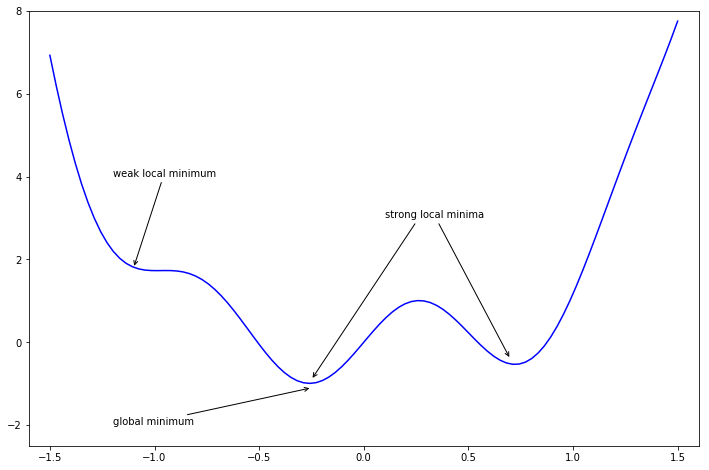

In [3]:
x = np.linspace(-1.5,1.5,100)
figure(figsize=(12,8))
plot(x, 1.45*x**4 + sin(6*x), 'b') # Note that the point labelled "weak local minimum" is not mathematically a weak local minimum for this function (show it!). This function is used only for visualization purposes.
axis((-1.6, 1.6,-2.5, 8))
annotate(s="global minimum", xy=(-0.25,-1.1), xytext=(-1.2, -2), arrowprops=dict(arrowstyle='->'))
annotate(s="weak local minimum", xy=(-1.1,1.8), xytext=(-1.2, 4), arrowprops=dict(arrowstyle='->'))
annotate(s="strong local minima", xy=(0.7,-0.4), xytext=(0.1, 3), arrowprops=dict(arrowstyle='->'))
annotate(s="", xy=(-0.25,-0.9), xytext=(0.25, 2.9), arrowprops=dict(arrowstyle='->'))

show() 

## With constraints, a global minimum might not be a stationary point

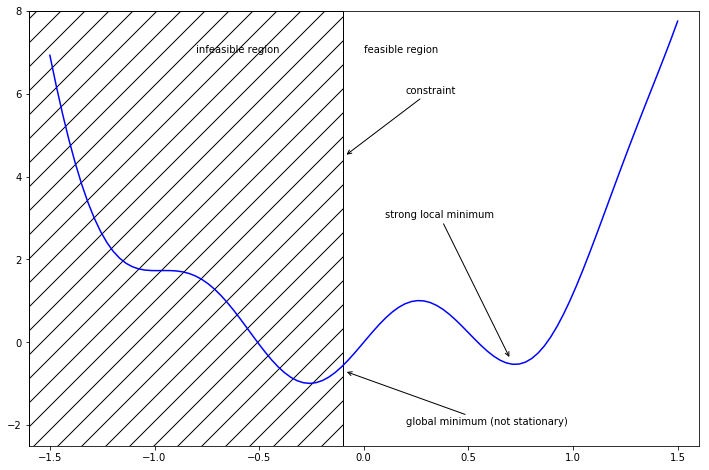

In [4]:
import matplotlib.patches as patches
x = np.linspace(-1.5,1.5,100)
figure(figsize=(12,8))
plot(x, 1.45*x**4 + sin(6*x), 'b')
axis((-1.6, 1.6,-2.5, 8))
annotate(s="global minimum (not stationary)", xy=(-0.09,-0.7), xytext=(0.2, -2), arrowprops=dict(arrowstyle='->'))
annotate(s="strong local minimum", xy=(0.7,-0.4), xytext=(0.1, 3), arrowprops=dict(arrowstyle='->'))
gca().add_patch(patches.Rectangle((-1.6, -2.5), 1.5, 10.5, hatch='/',fill=False))
text(0.0, 7, 'feasible region')
text(-0.8, 7, 'infeasible region')
annotate(s="constraint", xy=(-0.09, 4.5), xytext=(0.2, 6), arrowprops=dict(arrowstyle='->'))
show()

## Unimodality

- A function is __unimodal__ if it has a single extremum

- It is __strongly unimodal__ if along a straight line from every point to the extremum the gradient is negative (for a minimum) or positive (for a maximum)

- Example of a unimodal function: The Rosenbrock's function
$$ f(x_1, x_2) = 100(x_2-x_1^2)^2 + (1-x_1)^2$$

In [5]:
x,y = np.meshgrid(np.linspace(-1.7,1.7,100), np.linspace(-0.8,3,100))
R = (1-x)**2 + 10*(y-x**2)**2

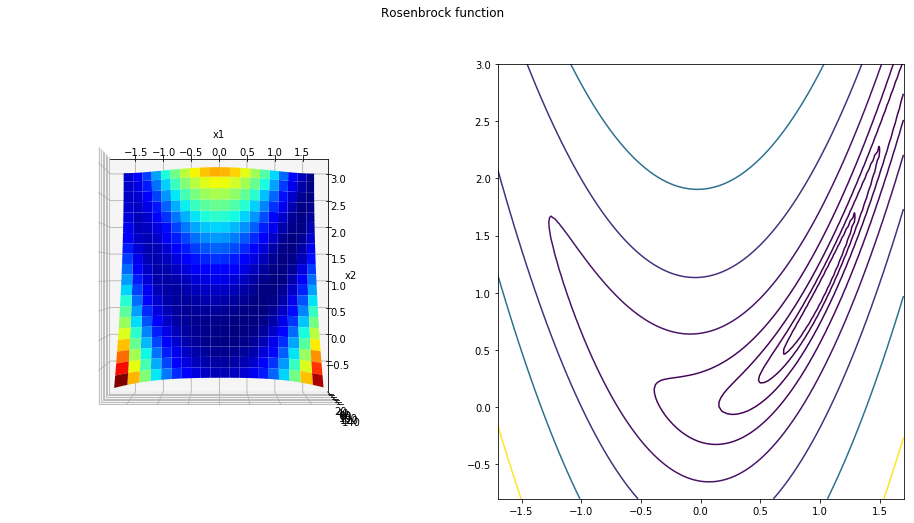

In [6]:
from mpl_toolkits.mplot3d import Axes3D
fig = figure(figsize=(16,8))
fig.suptitle('Rosenbrock function')

ax = fig.add_subplot(1,2,1, projection='3d')
ax.plot_surface(x, y, R, rstride=5, cstride=5, cmap=cm.jet, linewidth=0)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.view_init(elev=90, azim=-90)


ax = fig.add_subplot(1,2,2)
ax.contour(x, y, R, np.logspace(-1,2, 8))

show()

- Example of a strongly unimodal function

$$ f(x_1, x_2)=x_1^2 + x_2^2 - 0.2x_1x_2$$

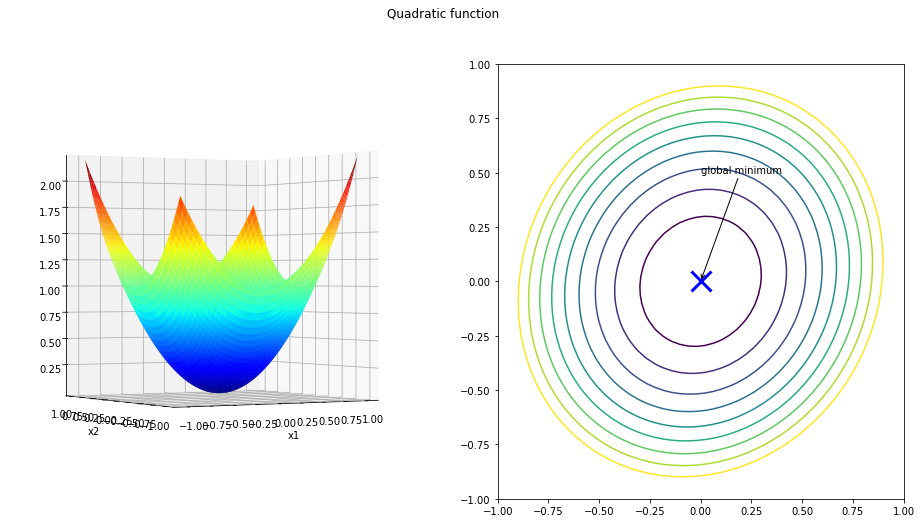

In [7]:
x, y = np.meshgrid(np.linspace(-1,1,50), np.linspace(-1,1,50))
f = x**2+y**2 - 0.2*x*y 
fig = figure(figsize=(16,8))
fig.suptitle('Quadratic function')

ax = fig.add_subplot(1,2,1, projection='3d')
ax.plot_surface(x, y, f, rstride=1, cstride=1, cmap=cm.jet, linewidth=0) 
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.view_init(elev=0, azim=-120)

ax = fig.add_subplot(1,2,2)
contour(x, y, f, linspace(0, 0.8, 10))
plot([0], [0], 'bx', markersize=20, markeredgewidth=3)
annotate(s="global minimum", xy=(0,0), xytext=(0,0.5), arrowprops=dict(arrowstyle='->'))
show()

## Convex functions

- A function is convex if its graph at any point $y$ is never below the tangent at any other point $x$ 
- Mathematically
$$ f(y) \ge f(x) + \nabla f(x)^T (y-x)$$
- It is strictly convex if instead of $\ge$ we use $>$
- Convex functions have a _global_ minimum
- Convex functions are unimodal, but not all unimodal functions are convex
 - Example: The negative Gaussian distribution
- Non-convex functions have often multiple local minima
 - Finding the global minimum is hard
 - Many, but not all, engineering problems are non-convex

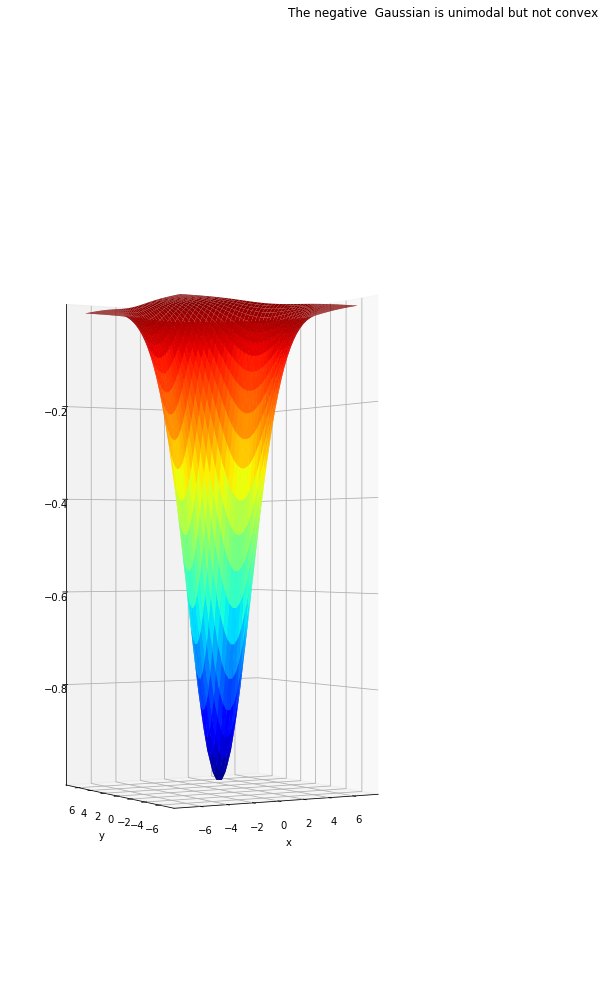

In [8]:
from mpl_toolkits.mplot3d import Axes3D
fig = figure(figsize=(16,16))
fig.suptitle('The negative  Gaussian is unimodal but not convex')

x, y = np.meshgrid(np.linspace(-7,7,50), np.linspace(-7,7,50))
ax = fig.add_subplot(1,2,1, projection='3d')
ax.plot_surface(x, y, -exp(0.1*(-x**2-y**2)), rstride=1, cstride=1, cmap=cm.jet, linewidth=0)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.view_init(elev=0, azim=-120)

show()

## Necessary condition for a local minimum

A __necessary__ condition for $x^*$ to be a _local minimum_ of $f(x)$ in $S$ is 

$$
\nabla f(x^*) \cdot d \ge 0
$$

for all feasible directions $d$.

If $x^*$ is an __interior point__, i.e., it is not at the boundary of the feasible region:

- because all directions are feasible, $x^*$ must be a stationary point when $$\nabla f(x^*) = 0$$ 
- The condition $\nabla f(x^*) = 0$ is __necessary but not sufficient__ for $x^*$ to be a minimum
 - This is because the same condition holds for maxima and saddle points

## Sufficient condition for a local minimum (univariate)

For the _univariate_ case (i.e., $x\in\mathbb{R})$, the __Taylor expansion__ around $x^*$ is

\begin{align}
f(x) &= f(x^*) + (x-x^*) f'(x^*) + \frac12 (x-x^*)^2 f''(x^*) + h.o.t.\\
f(x) - f(x^*) &= (x-x^*) f'(x^*) + \frac12 (x-x^*)^2 f''(x^*) + h.o.t.\\
\end{align}

If $x^*$ is an interior stationary point, $f'(x^*) = 0$, so we have a strong local minimum if 

$$ 
f(x) - f(x^*) \approx \frac12 (x-x^*)^2 f''(x^*)\gt 0
$$


$$\boxed{\large f''(x^*) \gt 0}\strut$$

-  At a stationary point $x^*$, $f''(x^*)>0$ is a sufficient condition of strong local minimum
- At a stationary point, $f''(x^*)\ge0$ is a necessary condition of strong local minimum (it is necessary that $f''(x^*)$ be non-negative. If it is negative, $x^*$ cannot be a minimum.)
- If $f''(x^*)=0$, we need to analyse the higher order terms

## Sufficient condition for a local minimum (multivariate)

For the _multivariate case_ (i.e., $x\in\mathbb{R}^N$ with $N>1$), the Taylor series is

$$
f(x) = f(x^*) + (x-x^*)^T \nabla f(x^*) + \frac12 (x-x^*)^T H(x^*) (x-x^*) + h.o.t.
$$

If $x^*$ is an interior stationary point, $\nabla f(x^*) = 0$. Let $d = x-x^*$. Then $x^*$ is a strong local minimum if

$$
\boxed{\large d^T H(x^*) d > 0 \qquad \forall d\strut}
$$

- At a stationary point $x^*$, $\large d^T H(x^*) d > 0$ (the Hessian is __positive definite__) is a sufficient condition of strong local minimum.  
- At a stationary point $x^*$, $\large d^T H(x^*) d \ge 0$ (the Hessian is __positive semidefinite__) is a necessary condition of strong local minimum. 


- Test for a $\bf{2\times2}$ matrix: It is positive definite if $$H_{11}>0 \;\;\;\textrm{and}\;\;\; \det(H)>0$$.
- If $H(x)$ is positive definite everywhere (e.g. for a quadratic function), $f$ is a __convex function__, and therefore the minimum is unique and a _global minimum_. 
- A matrix is positive definite if and only if all its __eigenvalues are positive__.
- If $H(x^*) = 0$, higher order terms determine whether $x^*$ is a minimum or not.

## Back to the can optimization

![beer can](http://www.iconarchive.com/download/i13047/gordon-irving/simpsons-2/Duff-1.ico)

Objective function: $$f(r) = r^2 + \frac{V}{\pi r}$$

Necessary condition for local minimum: $$0 = \frac{df}{dr} = 2r-\frac{V}{\pi r^2}$$

Candidate solution: $$ r^* = \left(\frac{V}{2\pi}\right)^{1/3}$$

- For $V=345 cm^3$, $r^* = 38\text{ mm}$

- This satisfies the constraints $25\text{ mm} \le r^* \le 50\text{ mm}$, hence, it is feasible. 

- We need to check sufficient condition $$ \frac{d^2 f}{d r^2} = 2+\frac{2V}{\pi r^3} \ge 0$$
 - Hence, $r^*$ is a minimum, and $h^* = V/(\pi r^2) = 76\text{ mm}$.

<!--- - Real cans have $r=33\text{ mm}$.---> 
    

- The upcoming optimization problems will be less straightforward!